# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**: Luis Pablo Segovia

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [1]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

### Ejemplo de uso

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

## esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

,x0,x1,x2,x3,x4,target
0,-0.170373,-0.594395,0.708241,0.449289,0.238207,-19.522335
1,-1.481609,0.554900,0.639000,-1.772205,1.141780,-36.079876
2,-0.979073,1.055319,0.524754,0.121493,1.286751,-7.758058
3,0.024257,-0.567720,0.017013,-1.035116,-0.393203,-12.457170
4,1.232421,0.169442,-0.324136,-1.013435,1.743958,44.750082


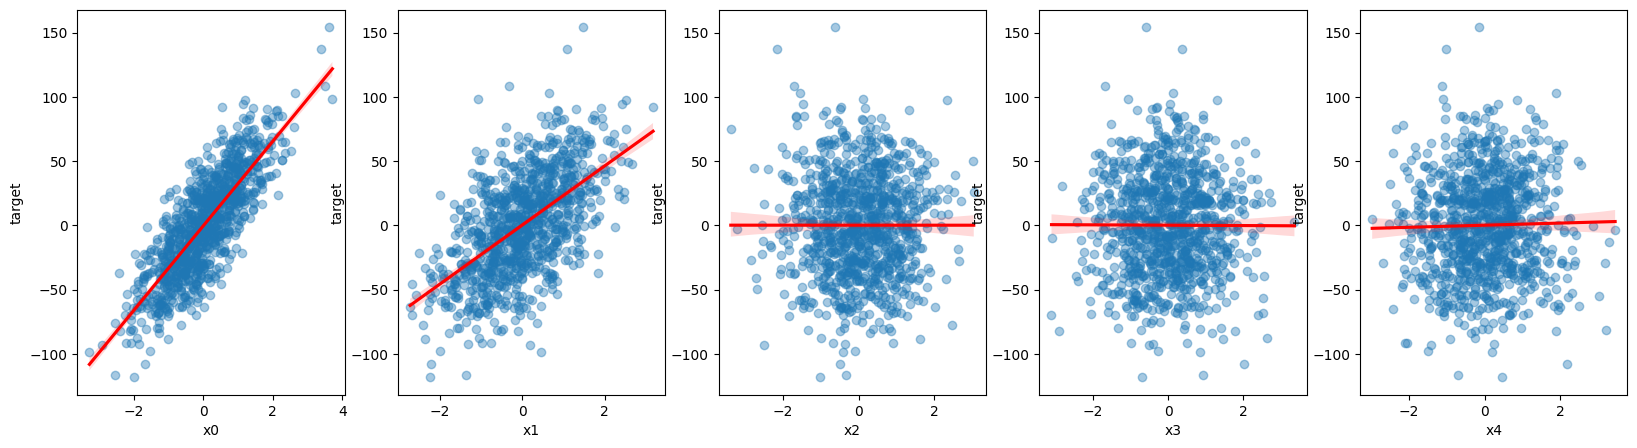

In [4]:
## vamos a visualizar estas variables
## creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

## Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)

Ahora agregamos _outliers_ a un nuevo dataset

In [5]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)

In [6]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)

Text(0.5, 1.0, 'Outliers (one-tailed)')

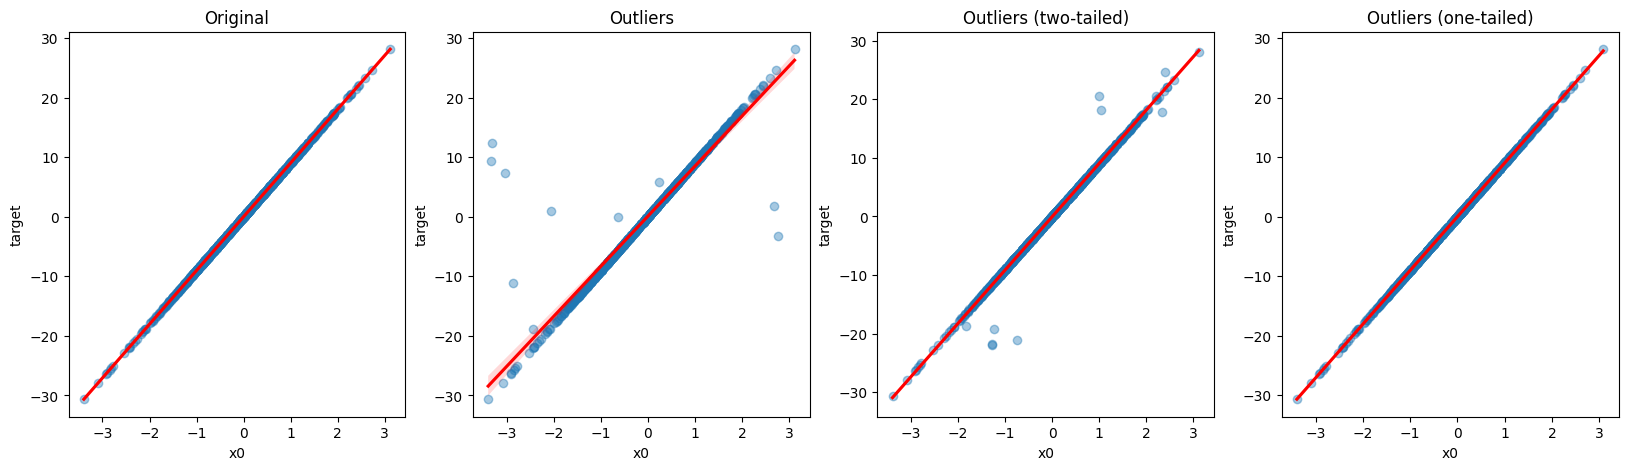

In [7]:
## vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')

Text(0.5, 1.0, 'Outliers')

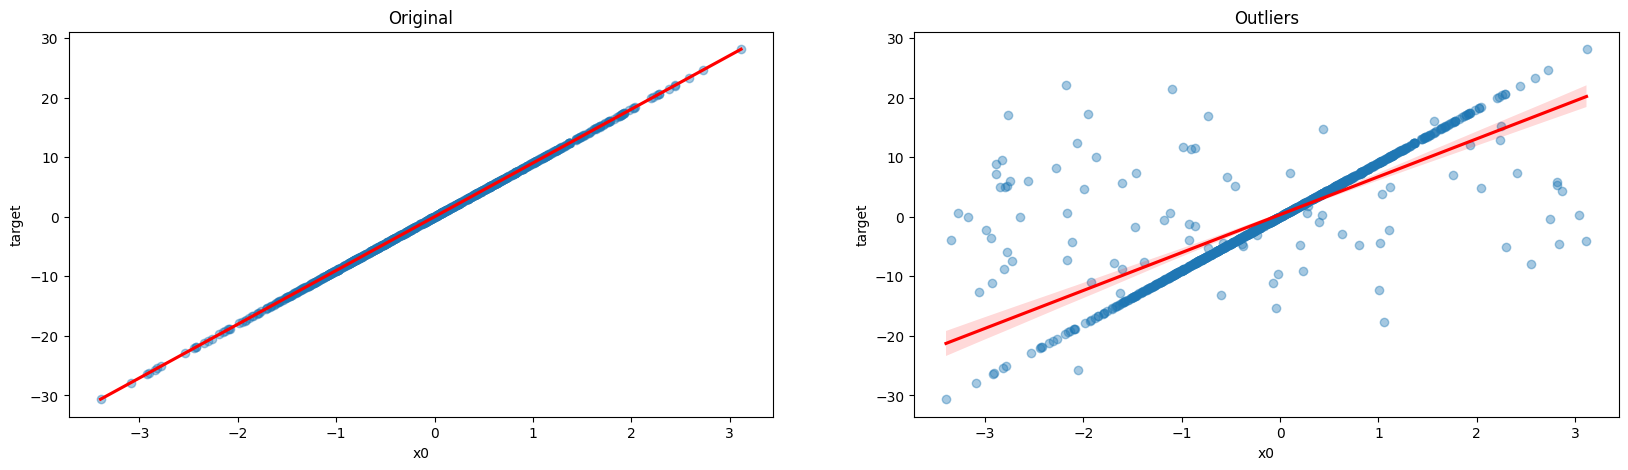

In [8]:
## y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

## vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

### Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test. 


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [9]:
import numpy as np
from tqdm import tqdm

In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

import seaborn as sns

In [38]:
## Parámetros de la simulación
n_exp = 100 # 1000
n_samples = 1000
n_features = 10
n_informative = 2
n_targets = 1

noise = np.linspace(0, 25, 5) # np.linspace(0, 100, 100)
bias = np.linspace(0, 25, 5) # np.linspace(0, 100, 20)

# Definimos el dataframe
df = pd.DataFrame(columns=['coef1','coef2','coef3','coef4','coef5','coef6','coef7','coef8','coef9','coef10','intercept','rmse','mae','bias','noise'])

In [39]:
## Esqueleto de la simulación
for _ in tqdm(range(n_exp)):
    for b in bias:
        for n in noise:
            data = generate_dataset(
                n_samples=n_samples,
                n_features=n_features,
                n_informative=n_informative,
                n_targets=n_targets,
                noise=n,
                bias=b,
                output='dataframe'
            )

            # Definimos X e y del dataset
            X = data.drop('target', axis=1)
            y = data['target']

            # Aplicamos el tran_test_split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=17) # Lo definimos para que sea constante el split

            # Realizamos la regresión lineal
            lin_model = linear_model.LinearRegression()
            lin_model.fit(X_train, y_train)

            # Predecimos el target de test
            y_pred = lin_model.predict(X_test)

            # Calculamos RMSE
            rmse = mean_squared_error(y_test, y_pred)

            # Calculamos MAE
            mae = mean_absolute_error(y_test, y_pred)

            # Generamos la información de cada iteracion
            iter = []
            for coef in lin_model.coef_:
                iter.append(coef)
            iter.append(lin_model.intercept_)
            iter.append(rmse)
            iter.append(mae)
            iter.append(b)
            iter.append(n)
            df.loc[len(df)] = iter

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.63it/s]


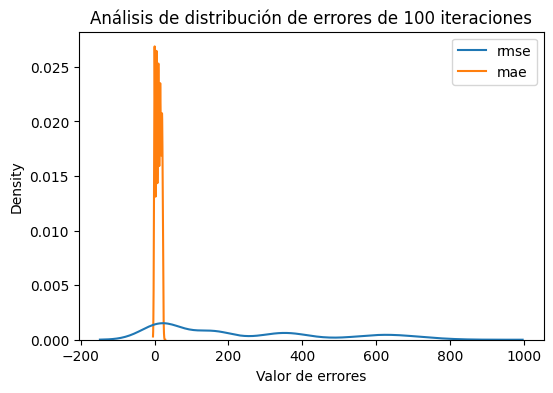

In [40]:
# Analizar distribución de RMSE y MAE
plt.figure(figsize=(6,4))
sns.kdeplot(df[['rmse','mae']])
plt.title(f"Análisis de distribución de errores de {n_exp} iteraciones")
plt.xlabel("Valor de errores")
plt.show()

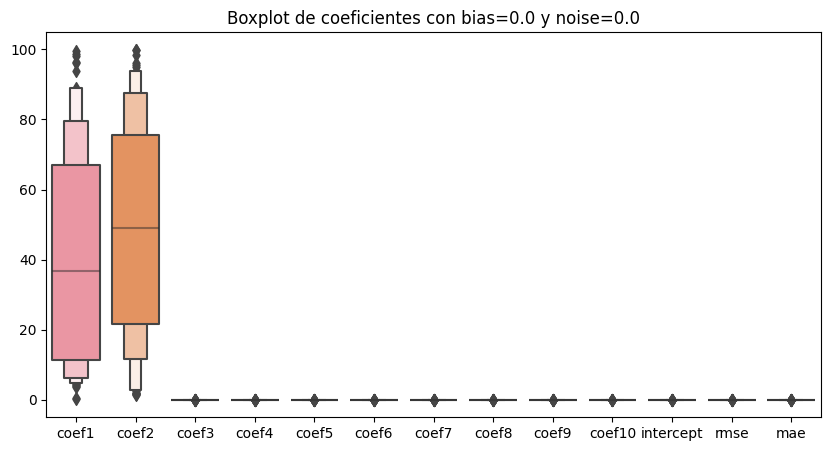

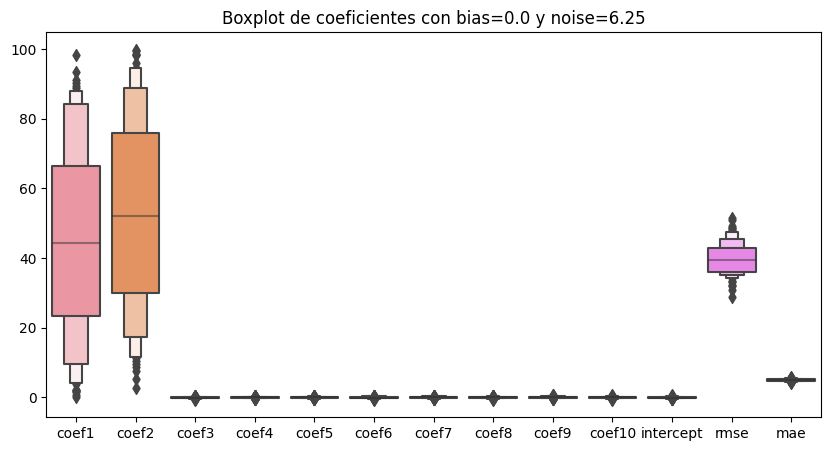

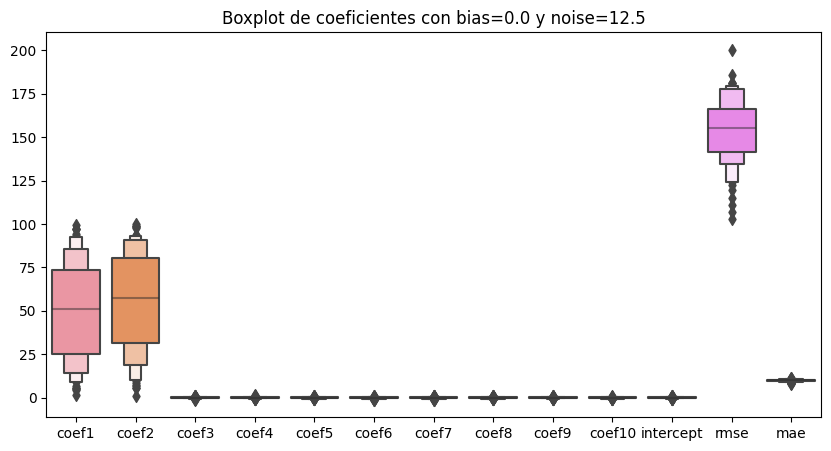

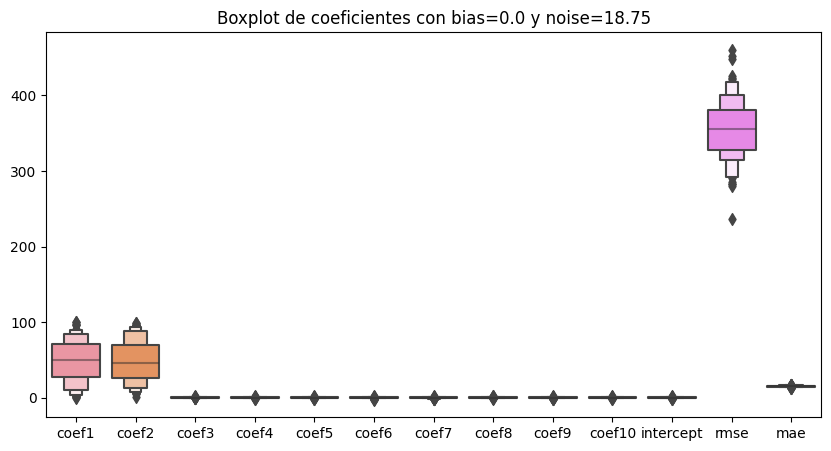

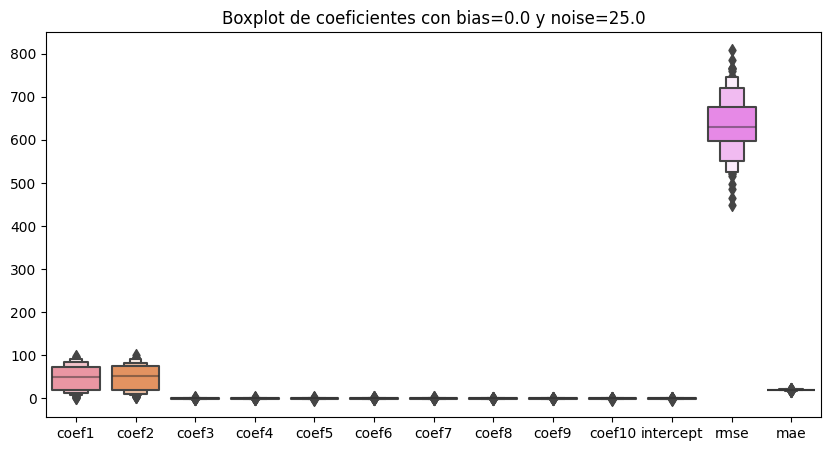

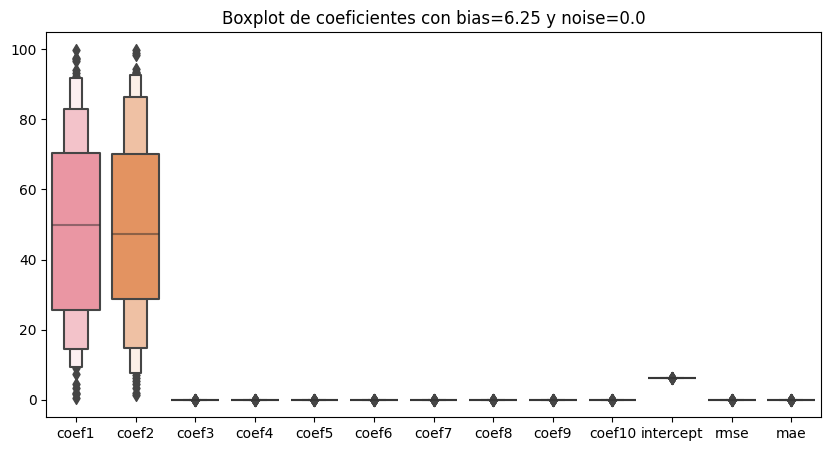

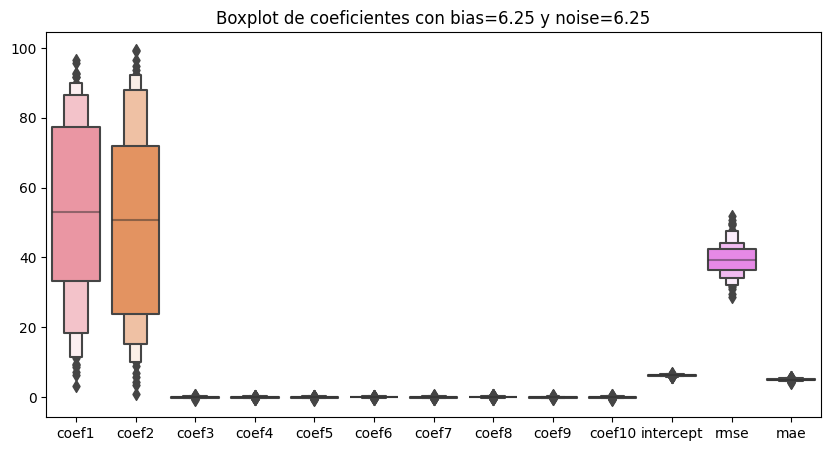

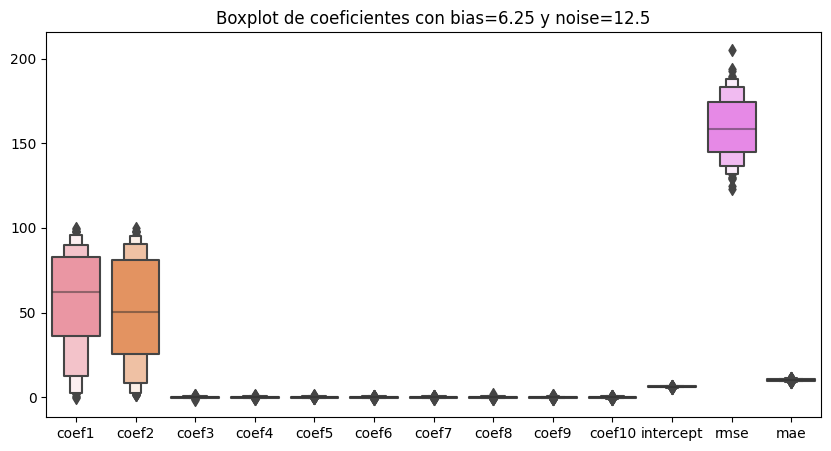

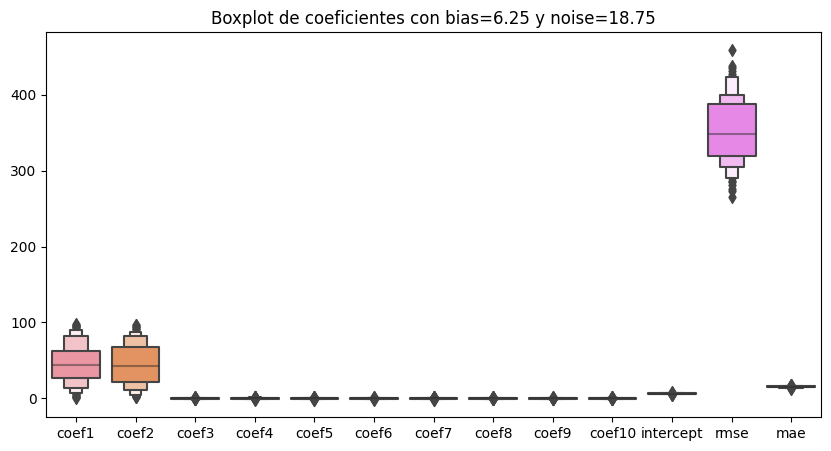

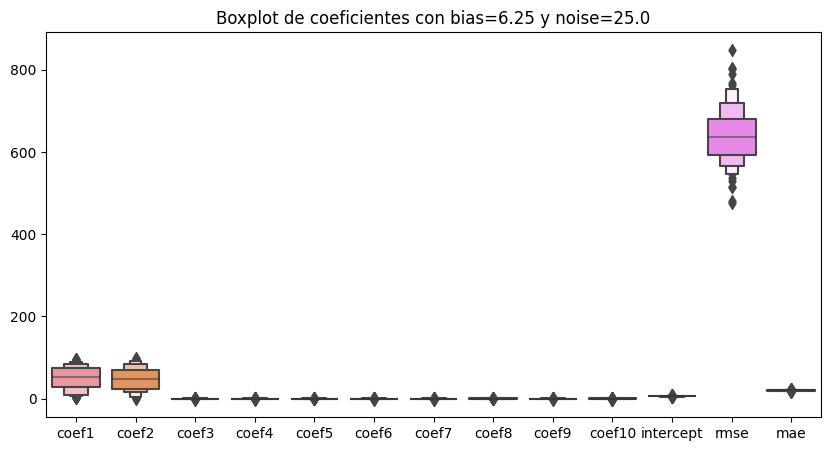

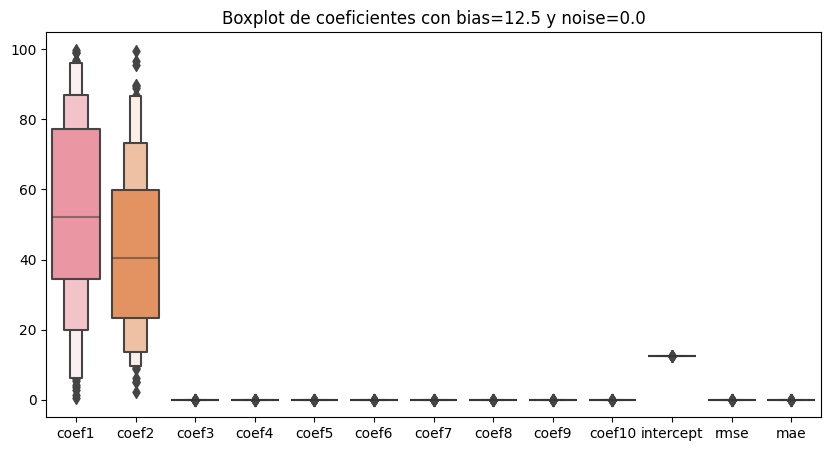

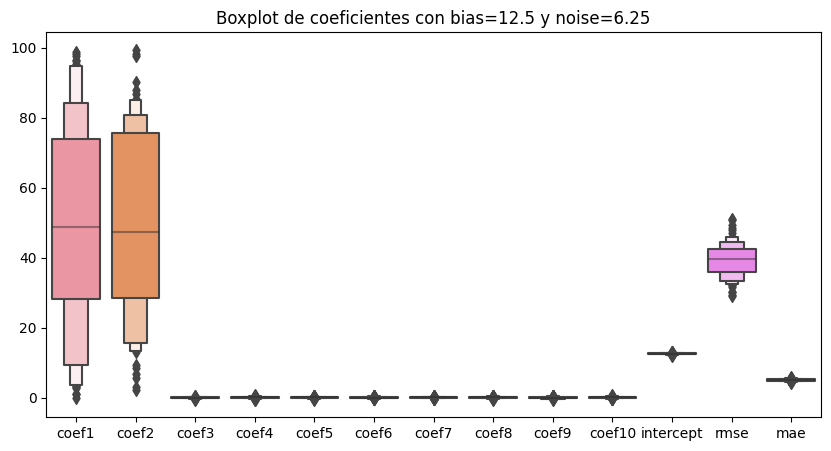

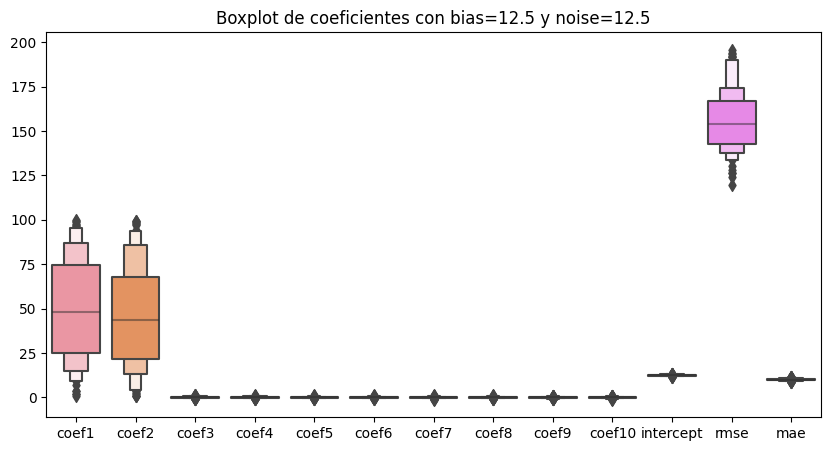

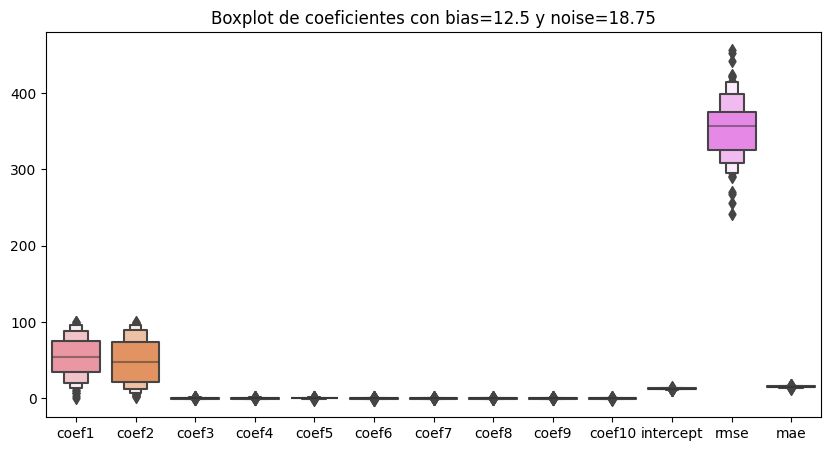

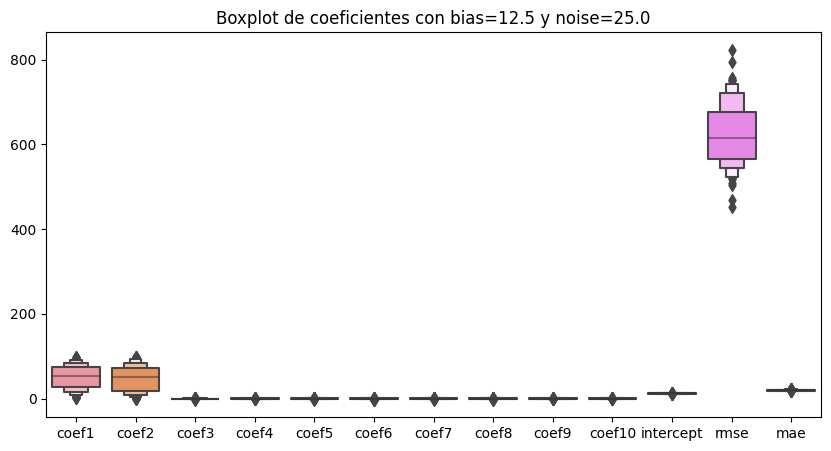

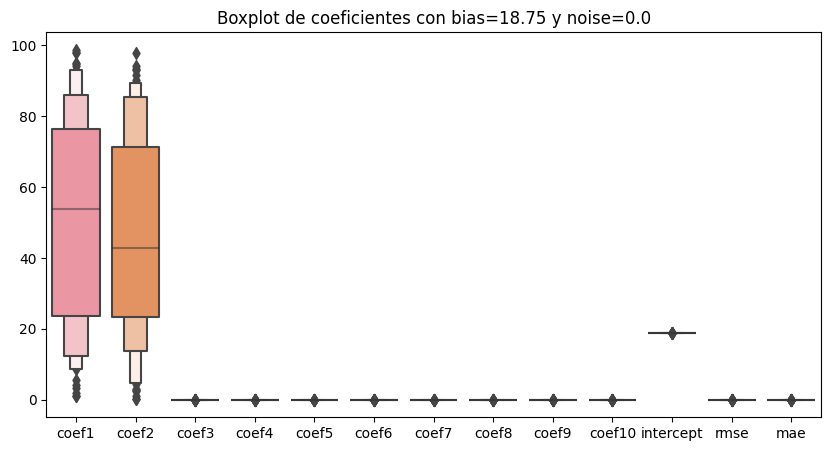

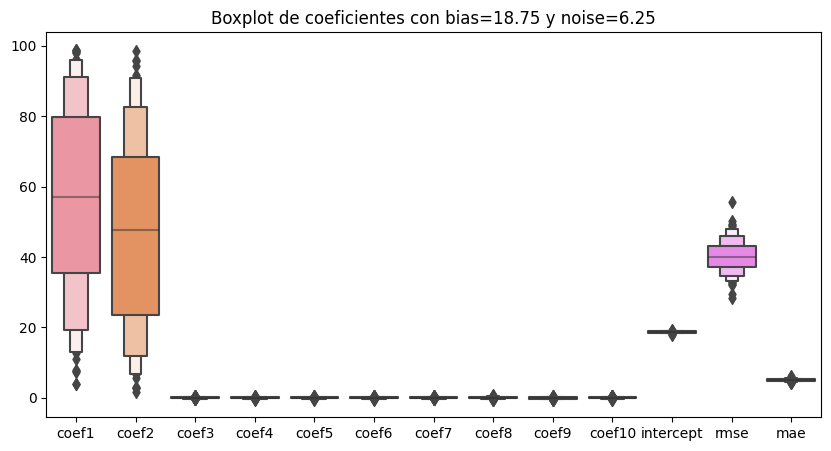

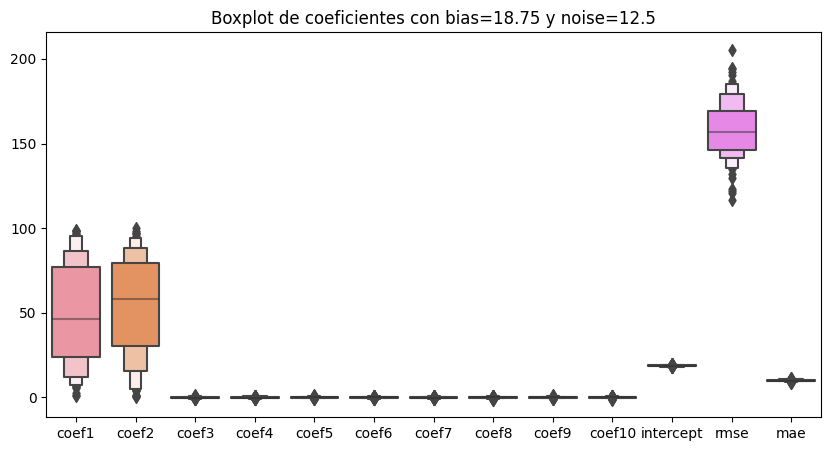

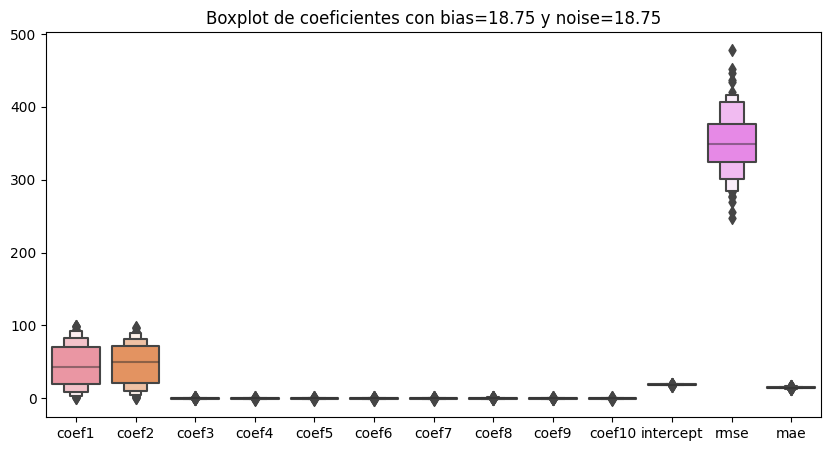

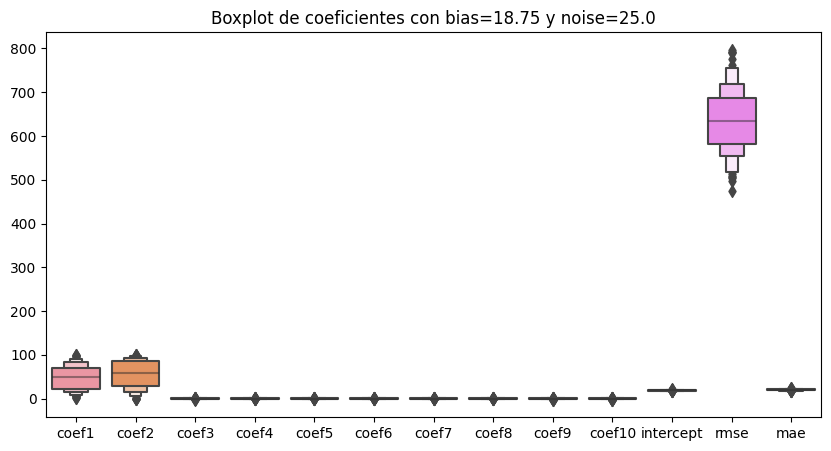

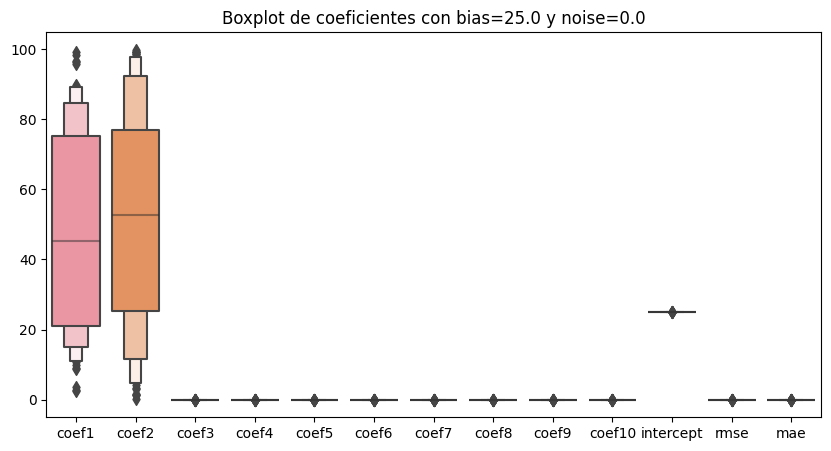

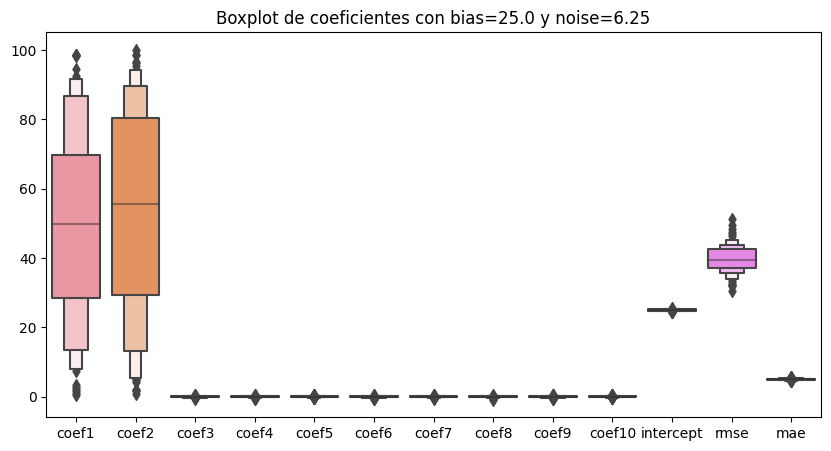

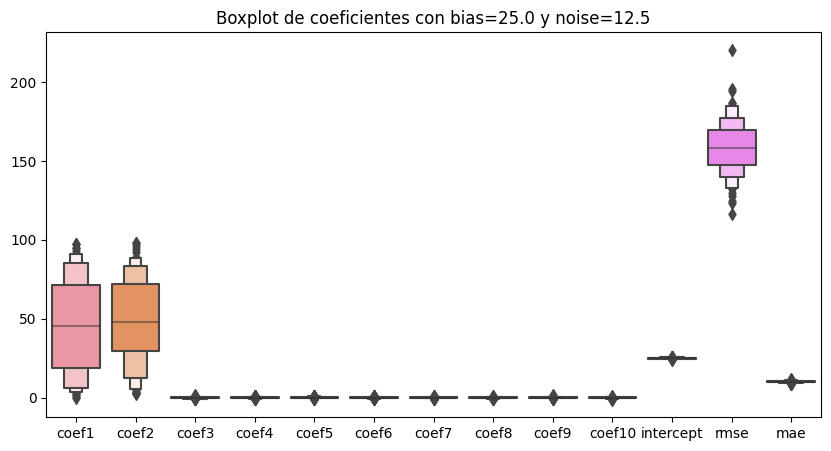

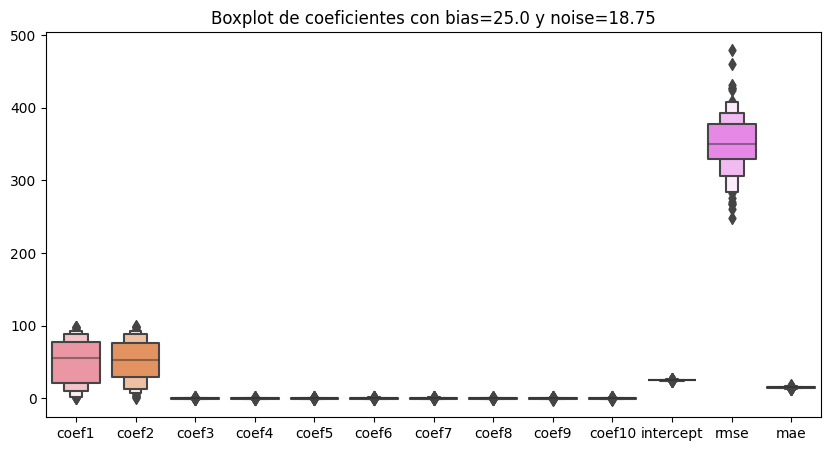

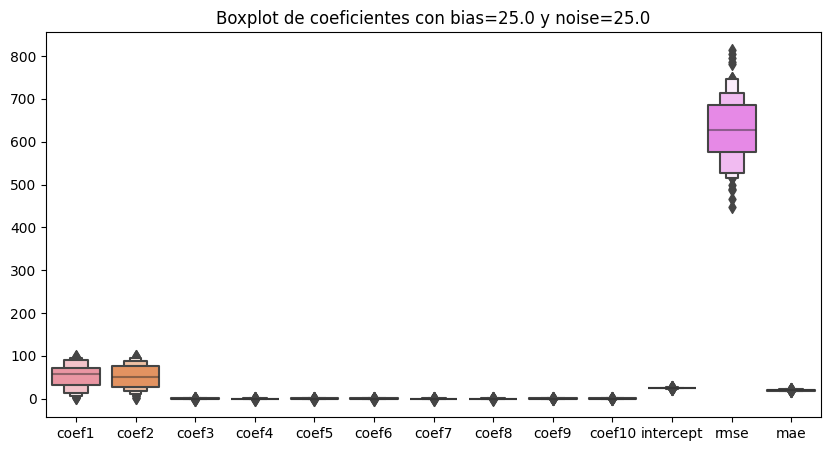

In [41]:
# Analizamos los coeficientes vs los diferentes bias y noise
for b in bias:
    for n in noise:
        plt.figure(figsize=(10,5))
        to_boxplot = df.loc[(df.bias == b) & (df.noise == n)]
        to_boxplot = to_boxplot.drop(columns=['bias','noise'])
        sns.boxenplot(data=to_boxplot)
        plt.title(f"Boxplot de coeficientes con bias={b} y noise={n}")
        plt.show()

### Qué pasa con los coeficientes de las variables no informativas?
- Los coeficientes de las variables no informativas, mayormente distribuyen en el _cero_.
- Los coeficientes de las variables informativas siempre son mayores que las no informativas.
- Los coeficientes de las variables informativas distribuyen siempre similar, no importa el bias.
- A menor _noise_ menor _rmse_.
- El error _rmse_ siempre es mayor que el _mae_.
- Los valores del _intercept_ son similares al _bias_.

### Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

In [42]:
from sklearn.linear_model import LinearRegression, HuberRegressor, RidgeCV

In [43]:
# Paso 1: Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con noise fijo en 0.5.
data_simple = generate_dataset(n_samples=1000,
                        n_features=1,
                        n_informative=1,
                        n_targets=1,
                        noise=0.5,
                        bias=5, # elijo este bias
                        output='dataframe')

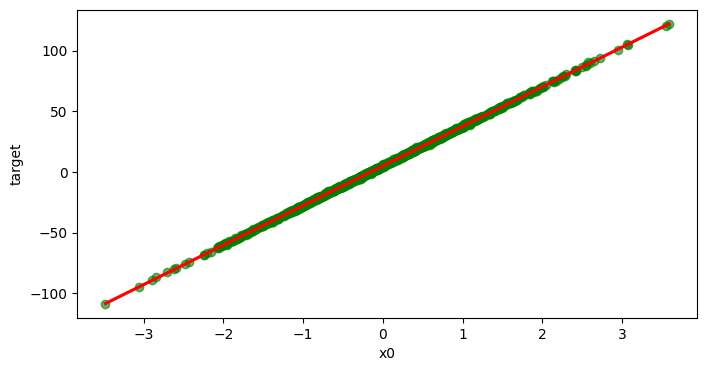

In [44]:
# Graficamos el dataset simple
plt.figure(figsize=(8,4))
sns.regplot(data=data_simple, x='x0', y='target', color='green', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.show()

In [45]:
# Paso 2: Generamos outliers fijando extreme_outliers
data_out_fijo = generate_outliers(
    df=data_simple,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=True,
    only_tails=False,
)

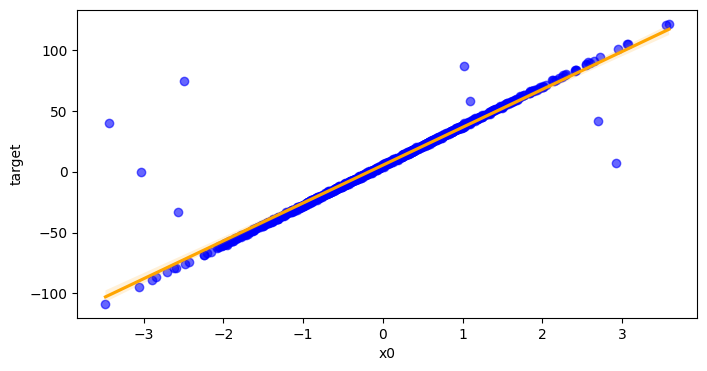

In [46]:
# Graficamos este dataset
plt.figure(figsize=(8,4))
sns.regplot(data=data_out_fijo, x='x0', y='target', color='blue', scatter_kws={'alpha': 0.6}, line_kws={'color': 'orange'})
plt.show()

In [47]:
# Paso 3: Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos

# Generamos los regresores
lin_reg = LinearRegression()
hub_reg = HuberRegressor()
rid_reg = RidgeCV()

models = [lin_reg, hub_reg, rid_reg]

In [48]:
# Generamos una función que calcule los errores
def calc_errores(data, modelo):
    # Aplicamos el tran_test_split
    X_train, X_test, y_train, y_test = train_test_split(data['x0'], data['target'], test_size=0.15, random_state=17) # Lo definimos para que sea constante el split

    # Realizamos la regresión lineal
    modelo.fit(np.array(X_train).reshape(-1,1), y_train)

    # Predecimos el target de test
    y_pred = modelo.predict(np.array(X_test).reshape(-1,1))

    # Calculamos RMSE
    rmse = mean_squared_error(y_test, y_pred)

    # Calculamos MAE
    mae = mean_absolute_error(y_test, y_pred)

    return (data, modelo, rmse, mae)

In [49]:
# Generamos un data frame para guardar los resultados
df = pd.DataFrame(columns=['dato', 'modelo','rmse','mae'])

# Generamos los rows de cada modelo
datos = [data_simple, data_out_fijo]
for data in datos:
    for modelo in models:
        row = calc_errores(data, modelo)
        df.loc[len(df)] = row
df['Tipo Dato'] = ['Simple', 'Simple', 'Simple', 'Outlier Fijo', 'Outlier Fijo', 'Outlier Fijo',]

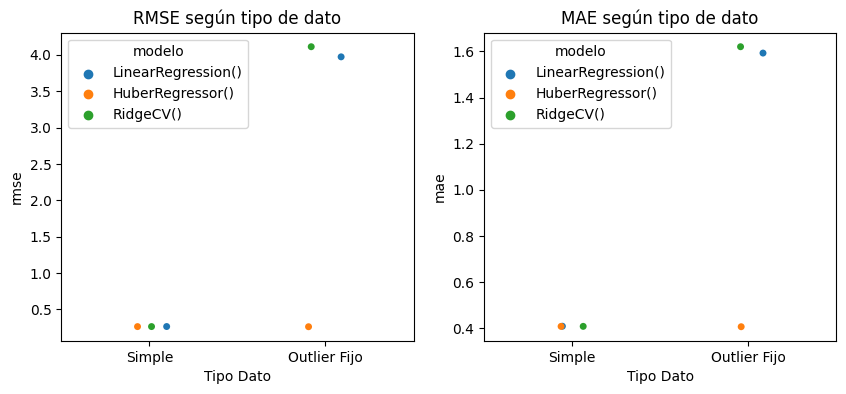

In [50]:
# Graficamos para comparar los errores vs tipo de dato
fig, axes = plt.subplots(1,2,figsize=(10,4))
sns.stripplot(x ='Tipo Dato', y ='rmse', data = df, hue ='modelo', ax=axes[0])
axes[0].set_title('RMSE según tipo de dato')
sns.stripplot(x ='Tipo Dato', y ='mae', data = df, hue ='modelo', ax=axes[1])
axes[1].set_title('MAE según tipo de dato')
plt.show()

- Se ve que con un nivel fijo y bajo (1%) de outliers, los regresores se comportan peor. Lo cual quiere decir que los errores aumentan.

In [51]:
# Paso 4: Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

# Generamos los diferentes datasets con porcentajes del 1% al 10%
porcentajes = np.linspace(0.01, 0.10, 10)
data_outliers = []
for p in porcentajes:
    data_out = generate_outliers(
        df=data_simple,
        columns=['x0'],
        percentage=p,
        extreme_outliers=True,
        only_tails=False,
    )
    data_outliers.append(data_out)

In [52]:
df = pd.DataFrame(columns=['dato', 'modelo','rmse','mae'])
for data in data_outliers:
    for modelo in models:
        row = calc_errores(data, modelo)
        df.loc[len(df)] = row
df['Porcentaje'] = [0.01,0.01,0.01,0.02,0.02,0.02, 0.03,0.03,0.03,0.04,0.04,0.04, 0.05,0.05,0.05,0.06,0.06,0.06,
        0.07,0.07,0.07,0.08,0.08,0.08, 0.09,0.09,0.09,0.1,0.1,0.1]

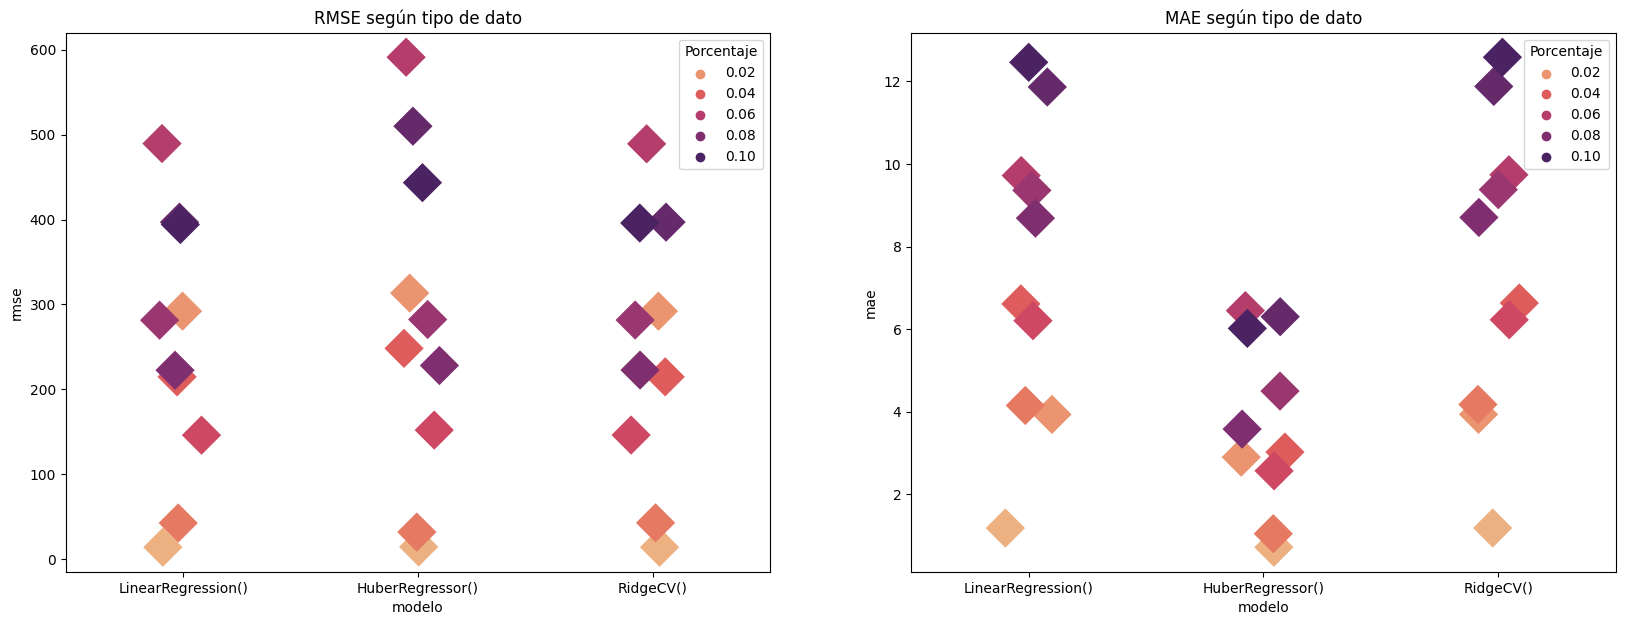

In [53]:
# Graficamos para comparar los errores vs tipo de dato y porcentaje
fig, axes = plt.subplots(1,2,figsize=(20,7))
sns.stripplot(x ='modelo', y ='rmse', data = df, hue ='Porcentaje', ax=axes[0], s=20, marker="D", palette='flare')
axes[0].set_title('RMSE según tipo de dato')
sns.stripplot(x ='modelo', y ='mae', data = df, hue ='Porcentaje', ax=axes[1], s=20, marker="D", palette='flare')
axes[1].set_title('MAE según tipo de dato')
plt.show()

### Insights encontrados
- Al aumentar el porcentaje de outliers, tanto RMSE como MAE aumentan.
- Al aumentar el porcentaje de outliers, para RMSE, los modelos LinearRegression y RidgeCV se comportan de manera similar pero el HuberRegressor tiene error más grande.
- Al aumentar el porcentaje de outliers, para MAE, el modelo HuberRegressor tiene un error menor que los otros dos.

## Problema de Clasificación

### Ejercicio 6

En este ejercicio vamos a jugar un poco con descenso de gradiente. Para esto consideremos lo visto en clase que es el problema de regresión.

Como paso inicial, vamos a sacarnos de encima la parte teórica. Recordemos que partimos del siguiente modelo

$$
y = \beta_0 + \beta_1 \cdot x
$$

En este caso nuestra función objetivo a optimizar será:

$$
MSE = ||y-\hat{y}||^2
$$


Para calcular el gradiente de la función de error cuadrático medio (MSE) con respecto a los parámetros $\beta_0$ y $\beta_1$, es útil primero expresar la función de coste de forma más explicita. Dado que $\hat{y} = \beta_0 + \beta_1 \cdot x$, podemos reescribir la función MSE como sigue:

$$
MSE(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)^2
$$

Aquí, $N$ es el número de observaciones en el conjunto de datos y $y_i$ y $x_i$ son el valor observado y el valor de la característica correspondiente para la i-ésima observación.

El gradiente de la función de coste está compuesto por las derivadas parciales de la función de coste con respecto a cada uno de los parámetros. Así, el gradiente es un vector de la forma:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{\partial MSE}{\partial \beta_0}, \frac{\partial MSE}{\partial \beta_1} \right]
$$

Las derivadas parciales se pueden calcular como sigue:

$$
\frac{\partial MSE}{\partial \beta_0} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

$$
\frac{\partial MSE}{\partial \beta_1} = \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

Así que finalmente tenemos:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i), \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i) \right]
$$

El cálculo del gradiente se usa en el descenso de gradiente para actualizar los parámetros $\beta_0$ y $\beta_1$ en cada iteración, en dirección opuesta al gradiente, para minimizar la función de coste.

Estos cálculos se pueden implementar en código Python de la siguiente manera:

```python
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X

    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))

    return d_beta0, d_beta1
```

Ahora, si quisieramos realizar esto de manera matricial, podemos hacer lo siguiente:

Primero, necesitamos cambiar la representación de nuestros datos. Podemos agregar un vector de unos a nuestra matriz de características para representar el término de intersección $\beta_0$. De esta manera, $X$ toma esta forma:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

Y nuestro vector de parámetros $\theta$ se verá así:

$$
\theta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Entonces, nuestra predicción $\hat{y}$ se calcula como $X\theta$:

$$
\hat{y} = X\theta = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix} \cdot \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Nuestra función de coste MSE se ve de la siguiente manera en forma matricial:

$$
MSE(\theta) = \frac{1}{N} (y - X\theta)^T (y - X\theta)
$$

Las derivadas parciales de esta función de coste con respecto a los parámetros se pueden calcular de la siguiente manera:

$$
\frac{\partial MSE}{\partial \theta} = \frac{-2}{N} X^T (y - X\theta)
$$


Esto se puede implementar en Python de la siguiente manera:

In [54]:
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    """
    Esta función calcula el gradiente de la función de coste del error cuadrático medio (MSE)
    para una regresión lineal simple. La función toma como entrada la matriz de características X,
    el vector de observaciones y y el vector de parámetros theta, y devuelve el gradiente, que
    es un vector de las mismas dimensiones que theta.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    Returns:
    grad : numpy.ndarray
        El gradiente de la función de coste. Un vector de las mismas dimensiones que theta.

    Examples:
    >>> X = np.array([[1, 1], [1, 2], [1, 3]])
    >>> y = np.array([2, 3, 4])
    >>> theta = np.array([0, 0])
    >>> gradient(X, y, theta)
    array([-4., -8.])
    """
    N = len(y)
    y_hat = X.dot(theta)

    grad = (-2 / N) * X.T.dot(y - y_hat)

    return grad


Aquí, `X` es la matriz de características extendida que incluye un vector de unos, `y` es el vector de observaciones, y `theta` es el vector de parámetros. La función devuelve el gradiente, que es un vector de las mismas dimensiones que `theta`.

#### Gradiente Descendente

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado
por nr de épocas pero también por tolerancia.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [80]:
# Paso 1: Crear una función GD que compute el gradiente descendente. Debe tener condición de frenado por nr de épocas pero también por tolerancia.
def gradient_descent(X, y, theta, epochs, tolerance):
    # Inicializadores
    N = len(y)
    gradientes = []
    gradiente = gradient(X,y,theta)
    epocas = [0]
    MSEs = [2e5]
    diferencia = 1e10

    # Se computa el GD
    for i in range(epochs):
        if diferencia > tolerance:
            y_hat = X.dot(gradiente)
            error = y-y_hat
            MSE = (1/N)*error.T.dot(error)
            gradientes.append(gradiente)
            MSEs.append(MSE)
            epocas.append(i)
            gradiente -= 0.05*gradient(X,y,gradiente)
            diferencia = abs(MSEs[-1]-MSEs[-2])
        else:
            break
    return gradiente, np.array(MSEs), np.array(epocas)

In [81]:
# Genero los datos
data = generate_dataset(n_samples=100, n_features=1, n_informative=1, n_targets=1, bias=0.1, random_state=17)
X = data['x0']
X = [[1,i] for i in data['x0']]
X = np.array(X)
y = np.array(data['target'])
theta = np.zeros(2)

# Separo el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=17)

In [87]:
# Calculamos para train y para test el gradient descend
train = gradient_descent(X_train,y_train,theta,epochs=100, tolerance=0.1)
test = gradient_descent(X_test,y_test,theta,epochs=100, tolerance=0.1)

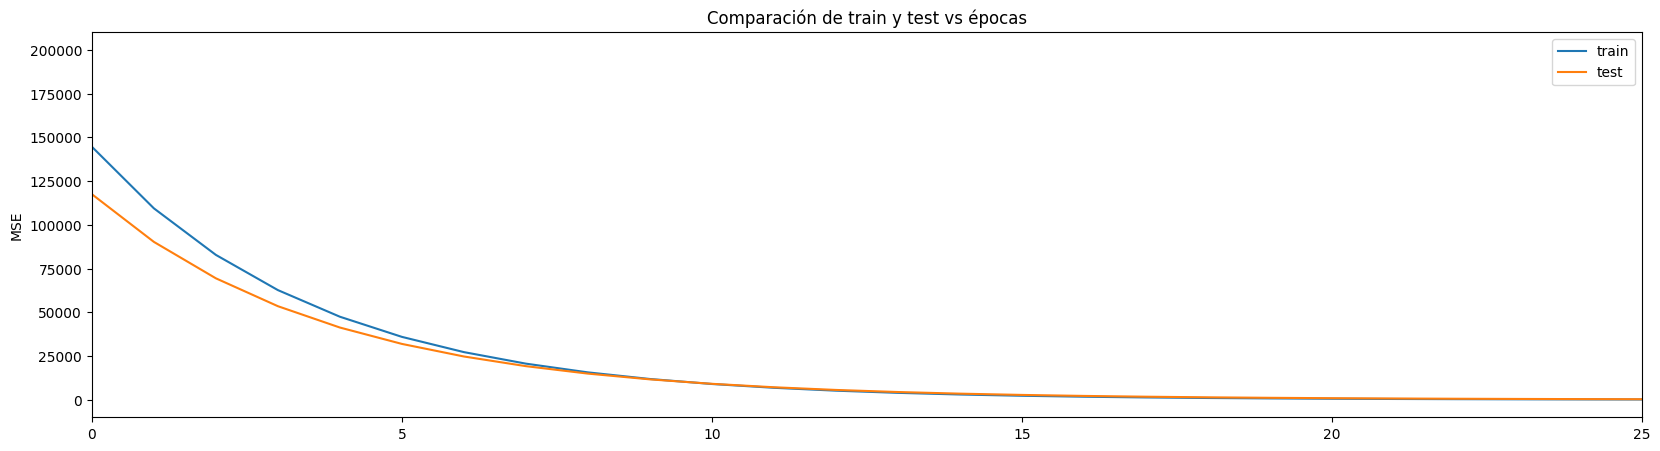

In [92]:
# Comparamos la evolución de train y test vs épocas
plt.figure(figsize=(20,5))
plt.plot(train[2], train[1], label='train')
plt.plot(test[2], test[1], label='test')
plt.ylabel('MSE')
plt.xlim(left=0, right=25)
plt.legend()
plt.title("Comparación de train y test vs épocas")
plt.show()

#### Gradiente Descendente Estocástico

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [136]:
# Genero los datos
data = generate_dataset(n_samples=100, n_features=1, n_informative=1, n_targets=1, bias=0.1, random_state=17)
X = data['x0']
X = [[1,i] for i in data['x0']]
X = np.array(X)
y = np.array(data['target'])
theta = np.zeros(2)

# Separo el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=17)

In [171]:
data = generate_dataset(n_samples=100, n_features=1, n_informative=1, n_targets=1, bias=0.1, random_state=17)
X = data['x0']
X = [[1,i] for i in data['x0']]
X = np.array(X)
y = np.array(data['target'])
theta = np.zeros(2)
muestras, features = X.shape

epochs = []
MSEs = []
gradientes = []
muestrass = []

for epoch in range(100):
    permutation = np.random.permutation(muestras)
    X_shuffled = X[permutation]
    y_shuffled = y[permutation]

    for muestra in range(muestras):
        y_hat = X_shuffled.dot(theta)
        error = y_shuffled - y_hat
        grad = -(2/muestras)*X_shuffled.T.dot(error)
        MSE = (1/muestras)*error.T.dot(error)
        theta -= 0.01*grad

        epochs.append(epoch)
        muestrass.append(muestra)
        MSEs.append(MSE)
        gradientes.append(theta)
        

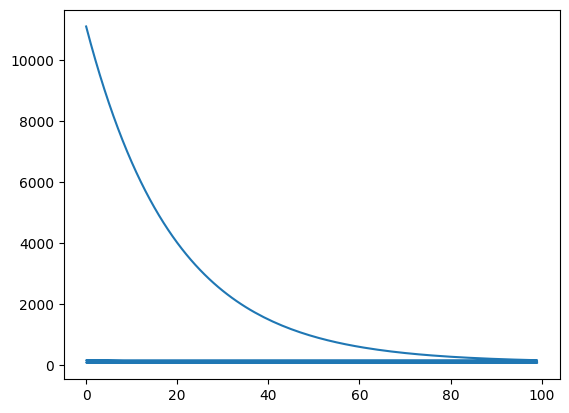

In [174]:
plt.plot(muestrass, MSEs)

In [145]:
# Calculamos para train y para test el stochastic gradient descend
train = stochastic_gradient_descent(X_train,y_train,theta,epochs=100)
test = stochastic_gradient_descent(X_test,y_test,theta,epochs=100)

IndexError: index 48 is out of bounds for axis 0 with size 1

Analice:

1. Cómo se comportan estos algoritmos? se puede ver la diferencia entre SGD y GD?.
2. Cómo afecto el _learning rate_ a estos algoritmos? Realice una simulación del mismo cambiando el `lr`.
3. Compare en una curva de Perdida vs Epoch los dos algoritmos. Nota algo interesante?

### Ejercicio 7

TBD